# Cross Industry Standard Process for Data Mining
CRISP-DM, para os mais íntimos

# 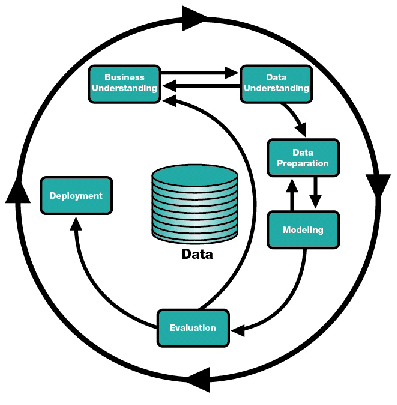

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [68]:
df = pd.read_excel (r'''C:\Users\7700160512\Desktop\WORK\Pessoal\MOKA\Machine_Learning_MPS_RD_2.xlsx''' )

In [69]:
print(df.shape)

(11442, 115)


In [70]:
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,PCN (CEP+NASC+SEXO),IDENT,CEP,MUNIC_RES,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,110004,2012,4,7,NaN,1112100490853,76974000200711161,1,76974000,110009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110004,2013,12,3,NaN,1113100408629,76960970199712051,1,76960970,110004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110015,2015,11,7,4.380507e+12,1115100750820,76920000200206211,1,76920000,110015,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110000,2015,12,7,4.287520e+12,1115101117526,76960970199712051,1,76960970,110004,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110009,2016,4,7,4.695284e+12,1116100542205,76974000200711161,1,76974000,110009,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#remove all of the columns we don’t consider for this analysis.
df = df[['MUNIC_RES', 'UTI_MES_TO', 'UTI_INT_TO', 'PROC_REA', 'VAL_SH', 'VAL_UTI', 'DIAG_PRINC', 'DIAG_SECUN', 'IDADE', 'DIAS_PERM' , 'DIAGSEC1', 'DIAGSEC2', 'DIAGSEC3' ]]

In [72]:
df.columns

Index(['MUNIC_RES', 'UTI_MES_TO', 'UTI_INT_TO', 'PROC_REA', 'VAL_SH',
       'VAL_UTI', 'DIAG_PRINC', 'DIAG_SECUN', 'IDADE', 'DIAS_PERM', 'DIAGSEC1',
       'DIAGSEC2', 'DIAGSEC3'],
      dtype='object')

In [21]:
df.dtypes

MUNIC_RES       int64
UTI_MES_TO      int64
UTI_INT_TO      int64
PROC_REA        int64
VAL_SH        float64
VAL_UTI       float64
DIAG_PRINC     object
DIAG_SECUN     object
IDADE           int64
DIAS_PERM       int64
DIAGSEC1       object
DIAGSEC2       object
DIAGSEC3       object
dtype: object

In [73]:
# Converting data types ( categorical feature )
df.DIAG_PRINC.value_counts()[:10]

E762    3845
E761    3537
E763    1669
E730     489
E760     450
E752     339
G800     208
E700     151
E90      134
E708      79
Name: DIAG_PRINC, dtype: int64

Method to transform feature code in numerical value : 
LabelCount encoding and it revolves around ranking categories by their counts in the train set. Because it ranks the values, either ascending or descending order can be used. LabelCount has certain advantages in comparison to standard count encoding - it is not sensitive to outliers and should not give the same encoding to different values.
Source : https://wrosinski.github.io/fe_categorical_encoding/

In [74]:
def labelcount_encode(X, categorical_features, ascending=False):
    print('LabelCount encoding: {}'.format(categorical_features))
    X_ = pd.DataFrame()
    for cat_feature in categorical_features:
        cat_feature_value_counts = X[cat_feature].value_counts()
        value_counts_list = cat_feature_value_counts.index.tolist()
        if ascending:
            # for ascending ordering
            value_counts_range = list(
                reversed(range(len(cat_feature_value_counts))))
        else:
            # for descending ordering
            value_counts_range = list(range(len(cat_feature_value_counts)))
        labelcount_dict = dict(zip(value_counts_list, value_counts_range))
        X_[cat_feature] = X[cat_feature].map(
            labelcount_dict)
    X_ = X_.add_suffix('_labelcount_encoded')
    if ascending:
        X_ = X_.add_suffix('_ascending')
    else:
        X_ = X_.add_suffix('_descending')
    X_ = X_.astype(np.uint32)
    return X_

In [75]:
df.DIAG_PRINC = labelcount_encode(df, ['DIAG_PRINC'])

LabelCount encoding: ['DIAG_PRINC']


In [76]:
df.head()

,MUNIC_RES,UTI_MES_TO,UTI_INT_TO,PROC_REA,VAL_SH,VAL_UTI,DIAG_PRINC,DIAG_SECUN,IDADE,DIAS_PERM,DIAGSEC1,DIAGSEC2,DIAGSEC3
0,110009,0,0,303080078,275.66,0.0,120,NaN,4,3,NaN,NaN,NaN
1,110004,0,0,303140151,554.75,0.0,56,NaN,15,4,NaN,NaN,NaN
2,110015,0,0,301060010,43.65,0.0,1,0,13,1,NaN,NaN,NaN
3,110004,0,0,303030046,131.92,0.0,1,0,18,3,NaN,NaN,NaN
4,110009,0,0,303140100,152.97,0.0,31,0,8,2,NaN,NaN,NaN


In [78]:
# code from : https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 13 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
DIAGSEC3,11441,100.0
DIAGSEC2,11436,99.9
DIAGSEC1,11423,99.8
DIAG_SECUN,4221,36.9


In [4]:
# Encoder ( http://contrib.scikit-learn.org/categorical-encoding/)
X_cleaned = transform(df, ['DIAG_PRINC'])

NameError: name 'transform' is not defined

Um critério utilizado é desprezar as features com mais de 50% valores nulos 

In [28]:
# Version 2
df.isnull().sum(axis = 0)

MUNIC_RES         0
UTI_MES_TO        0
UTI_INT_TO        0
PROC_REA          0
VAL_SH            0
VAL_UTI           0
DIAG_PRINC        0
DIAG_SECUN     4221
IDADE             0
DIAS_PERM         0
DIAGSEC1      11423
DIAGSEC2      11436
DIAGSEC3      11441
dtype: int64

In [31]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
DIAGSEC3,11441,0.999913
DIAGSEC2,11436,0.999476
DIAGSEC1,11423,0.998339
DIAG_SECUN,4221,0.368904
DIAS_PERM,0,0.000000
IDADE,0,0.000000
DIAG_PRINC,0,0.000000
VAL_UTI,0,0.000000
VAL_SH,0,0.000000
PROC_REA,0,0.000000


# Exploratory data analysis (EDA)

It´s an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data

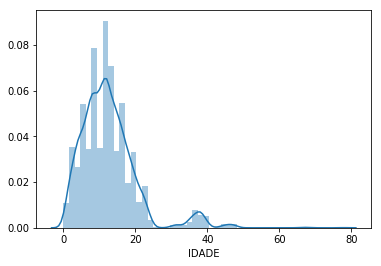

In [49]:
#histogram
sns.distplot(df['IDADE']);

In [50]:
df.IDADE.describe()

count    11442.000000
mean        12.582328
std          7.939643
min          0.000000
25%          7.000000
50%         12.000000
75%         16.000000
max         78.000000
Name: IDADE, dtype: float64

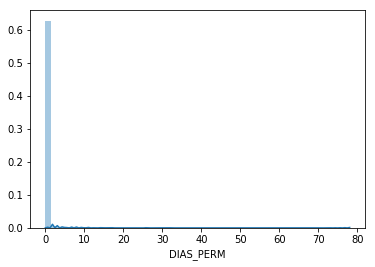

In [79]:
#histogram
sns.distplot(df['DIAS_PERM']);

In [ ]:
Valores zerados para dias de permanência 